#  PCA - PRINCIPAL COMPONENT ANALYSIS

This notebook is intended to act as a **high level overview** of PCA - Principal Component Analysis.

Principle Component Analysis is a Linear Algerbra technique that is used for 2 purposes:
    
1. ***Feature Reduction:***

    Reduce the feature space while retaining the information that will be relavent for modeling
    - By reducing the dimensionality (features) of our data  we have fewer variables / relationships
      to consider, thereby reducing our likelihood of overfitting a model.
    - This may create performance gains computationally by allowing us to deal with fewer dimensions in models that  preprocess data with PCA.


2. ***Feature Extraction:***

    New Principal components are generated
    - These components retain most of the relevent information (variance) from the variables that make them up.
    - Due to the orthoginal nature of PCA, PCA features are largely independant of one another which again helps with things like overfitting and colinearity.


## PCA BREAKDOWN

Essentially what PCA does is derive a new set of dimensions from your dataset in such a way that all dimensions are orthogonal (math talk for being perpendicular to one another on a scatterplot). It then ranks the pricipal componets according to the varience of data along them, more varience (spread) = more important.

To get a more intuitive understanding and visualization of this process you can follow these links:

- PCA Visuals & Breakdown
    - [PCA, Sentosa Applet](http://setosa.io/ev/principal-component-analysis/)
    - [The Math Behind PCA](https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643)
    - [PCA in 5 Minutes](https://youtu.be/HMOI_lkzW08)
    



## WHEN & HOW TO USE

1. ***WHEN PCA IS USEFUL***

    1. You want to reduce the number of features in your data, and you are not sure which are the best pull out.
    2. You want to make sure that your features are independent of one another.
    3. You are comfortable with the fact that your new features may be less interpretable.
    

2. ***HOW TO USE IT***

    Below I'll be demonstrating a few ways that we can use PCA pythonically and very briefly showing some of the underlying mathematics; this is intended as a quick and dirty demo so as to give you a greater general idea of ***why*** PCA works the way it does.
    
    
Data used in this example: [Iris Data](https://archive.ics.uci.edu/ml/datasets/iris)

In [1]:
#Let's go ahead and import some standard Data Science Libraries

import numpy as np # A wide varierty of mathmatical and statistical functions
import pandas as pd # For Dataframes and data manipulation
import sklearn as sk # To be able to apply some ML based techniques on our data

In [2]:
#Now that we have our libraries we can pull down a basic data set to experiment with

#UCI link to MPG Data - a useful toy dataset
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

#Column names for data, which the link lacks
col_names = ['Sepal Length - cm', 'Sepal Width - cm', 'Petal Length - cm', 'Petal Width - cm', 'Class']

#Reading the data into a pandas dataframe
df = pd.read_csv(data,sep=',',names=col_names) 

#check the first 5 observations of data, get the basic meta data, and the descriptive stats
print(df.head())
print(df.info(verbose=True)) 
print(df.describe())

   Sepal Length - cm  Sepal Width - cm  Petal Length - cm  Petal Width - cm  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

         Class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length - cm    150 non-null float64
Sepal Width - cm     150 non-null float64
Petal Length - cm    150 non-null float64
Petal Width - cm     150 non-null float64
Class                150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
       Sepal Length - cm  Sepal Width - cm  Petal Len

![Oh, Wow](https://i.kym-cdn.com/entries/icons/original/000/023/464/wowowne.jpg)

Cool, now our data is nearly prepped we can go ahead standardize it and begin to transform it with sklearn's PCA functions!

Since PCA involves linear transformations with the **covariance** between features, the interpretability of the data and  
vizualizations can be dramatically affected by the different scales of each feature.

That is why it is wise before conducting PCA that you standardize your feature space (dataframe) for more :

[Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling)

[Sklearn: Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)


*Reminder:* **Covariance** normalized is the **Correlation Coefficient** ~ keep these terms in your mind it will help you learn in the long run!


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Now lets go ahead and seperate our target and features

target = df.loc[:,['Class']]
features = df.loc[:,['Sepal Length - cm', 'Sepal Width - cm', 'Petal Length - cm', 'Petal Width - cm']]

# convert these over to arrays to make it easier to deal with in sklearn

y = target.values
x = features.values

#Standardize our features
x = StandardScaler().fit_transform(x)

# Uncomment out the below lines to see how the features are transformed by being standardized = ctrl + /
# from IPython.display import display
display('Before Standarization',features.head(5))
display('After Standardization',pd.DataFrame(x,columns=features.columns).head(5))



'Before Standarization'

,Sepal Length - cm,Sepal Width - cm,Petal Length - cm,Petal Width - cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


'After Standardization'

,Sepal Length - cm,Sepal Width - cm,Petal Length - cm,Petal Width - cm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [15]:
# Now that we have our data standardized we can go ahead and use PCA to reduce the number of dimensions of our dataset

pca = PCA(n_components=2) # our PCA model ~ we want to project our 4 dimensional input down to 2 dimensions
# you can also simply enter a percentile (i.e. ".95") and the pca model will continue project your dimensions down to
# till it creates enough principal components that those components cumulativly explain the variance of your data

principal_components = pca.fit(x) #using the PCA model to transform our feature space

# check out the explained variance of each component
principal_components.explained_variance_ratio_ 

array([0.72770452, 0.23030523])

In [19]:
# We now see that after the dimensionality reduction we are going to be left with 2 components, 1 of which
# explains about 72% of the variance in the data set, the other about 23%
# lets go ahead and transform our original data set using the PCA model and visual what is happening

principal_components = pca.fit_transform(x)

# Pop that bad boy into a dataframe
principal_df = pd.DataFrame(principal_components, columns=['PC1','PC2']) # our new columns are the principal components

# Lets merge it back with our target so we can visualize what is going on
principal_df['Class']=target
principal_components
principal_df.head(5)
### we got two new features and target, then we create a df.

,PC1,PC2,Class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [6]:
# a little notebook magic to upgrade our seaborn package
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /anaconda3/lib/python3.6/site-packages (0.9.0)


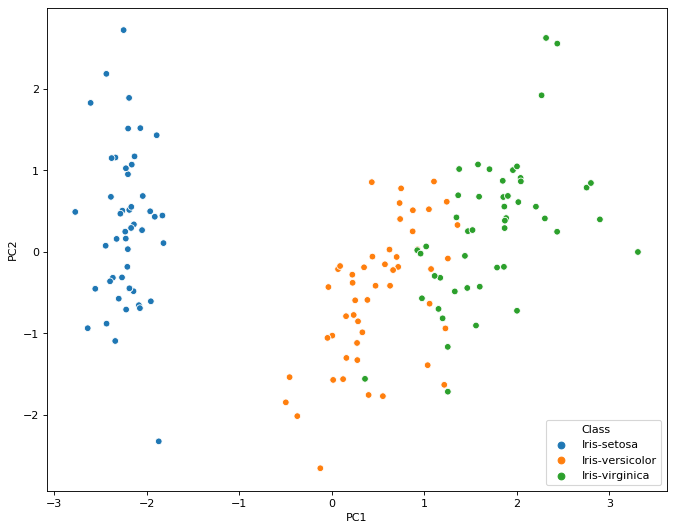

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#this would be like 48 lines in matplotlib - SNS makes things much simpler
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
sns.scatterplot(x=principal_df['PC1'],y=principal_df['PC2'],hue=principal_df['Class'])

### pc1 can explain more variance,so on xline can be divided into 3 groups, yline is not obvious.

### INTERPRETING THE PLOT

So here we can actually see our 4 dimension data projected down to two new dimnesions that largely explain the variance within our feature space.

After the algorithm completes its calculations, each vector returned by the algorithm is rank sorted by the amount of variance it explains in the dataset.

Put another way, our first principal component axis explains more variance than points along our 2nd principal component axis. So points traveling along the x-axis show more difference than points traveling along the y-axis.

After colorizing the observations (points in the scatter) we can see that differnces along the first PC are an excellent indicator for what type of flower is in that given

observation. If we were to take this a step further and now utilize some sort of classifier on this new PCA output we could make predictions on what type of flower a given 

observation is based upon its value. 

***High Value Cat Meme - A gift for reading my short tutorial***

![Algebra Cat](http://www.quickmeme.com/img/e3/e38bdd13bc8dd19873da87e971cb6a277b721355be0026dda4379d0bb3446c28.jpg)